<div style="text-align:center">
    <h1>Energy Data Case Study</h1>
</div>

## Segments of the notebook:
- Data preparation and initial cleaning
- EDA
- Cohort design
- Correlation analysis
- Cohort & consumption analysis
- Churn analysis

The folowing shall aim to find out elements influencing customer development the most and make reccomendations accordingly.

Please don't forget to have the data file in the same directory as this notebook should you wanna run all cell.

In [4]:
import pandas as pd 
import numpy as np
import sqlite3
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#importing CSV file
df = pd.read_csv('Case_Study_Data_Analyst_2_2.csv', sep=';')
df.head()

,Contract_ID,Customer_ID,Sales_channel,Supply_start,Supply_end,Yearly_consumption,Payment_method,Gross_margin,Commodity,Postcode_2,Is_standard_tariff,Population_municipality
0,3228787796,3465711501,Customers recruit customers,2007-05-01,2007-10-31,4035,No bank details,"83,79 €",Power,23,True,25001-100000 residents
1,3709433756,1806480484,Direct sales,2007-08-01,2010-12-31,6577,No bank details,"112,25 €",Power,22,True,>500000 residents
2,1670792889,427852089,Inbound and other channels,2007-11-01,2009-11-30,3586,No bank details,"89,54 €",Power,20,True,>500000 residents
3,4104584426,3516911733,Inbound and other channels,2007-11-01,2011-04-30,1195,No bank details,"-12,97 €",Power,20,True,>500000 residents
4,1493963697,3470506741,Direct sales,2008-01-01,2008-01-31,1048,No bank details,"142,27 €",Power,44,True,25001-100000 residents


In [6]:
df.shape

(43416, 12)

In [7]:
df.dtypes

Contract_ID                 int64
Customer_ID                 int64
Sales_channel              object
Supply_start               object
Supply_end                 object
Yearly_consumption          int64
Payment_method             object
Gross_margin               object
Commodity                  object
Postcode_2                  int64
Is_standard_tariff           bool
Population_municipality    object
dtype: object

In [8]:
#changing column names into lower case
df.columns = df.columns.str.lower()

#fixing data type for date columns
df['supply_start'] = pd.to_datetime(df['supply_start'], format='%Y-%m-%d', errors='coerce')
df['supply_end'] = pd.to_datetime(df['supply_end'], format='%Y-%m-%d', errors='coerce')

#fixing data type & removing str for gross_margin column
df['gross_margin'] = pd.to_numeric(df['gross_margin'].replace('[^\d,]', '', regex=True).str.replace(',', '.', regex=True), errors='coerce')

In [9]:
df.dtypes

contract_id                         int64
customer_id                         int64
sales_channel                      object
supply_start               datetime64[ns]
supply_end                 datetime64[ns]
yearly_consumption                  int64
payment_method                     object
gross_margin                      float64
commodity                          object
postcode_2                          int64
is_standard_tariff                   bool
population_municipality            object
dtype: object

In [10]:
df.head()

,contract_id,customer_id,sales_channel,supply_start,supply_end,yearly_consumption,payment_method,gross_margin,commodity,postcode_2,is_standard_tariff,population_municipality
0,3228787796,3465711501,Customers recruit customers,2007-05-01,2007-10-31,4035,No bank details,83.79,Power,23,True,25001-100000 residents
1,3709433756,1806480484,Direct sales,2007-08-01,2010-12-31,6577,No bank details,112.25,Power,22,True,>500000 residents
2,1670792889,427852089,Inbound and other channels,2007-11-01,2009-11-30,3586,No bank details,89.54,Power,20,True,>500000 residents
3,4104584426,3516911733,Inbound and other channels,2007-11-01,2011-04-30,1195,No bank details,12.97,Power,20,True,>500000 residents
4,1493963697,3470506741,Direct sales,2008-01-01,2008-01-31,1048,No bank details,142.27,Power,44,True,25001-100000 residents


In [11]:
df.loc[df['sales_channel'] == 'LichtBlick-Homepage', 'sales_channel'] = 'Homepage'


In [12]:
#checking for duplicates
df.duplicated().sum()

0

In [13]:
df.isna().sum()

contract_id                    0
customer_id                    0
sales_channel                  0
supply_start                   0
supply_end                 10833
yearly_consumption             0
payment_method                 0
gross_margin                   0
commodity                      0
postcode_2                     0
is_standard_tariff             0
population_municipality        0
dtype: int64

In [14]:
#assuming the null values in supply_end mean contract is still running, I'm replacing nulls with today's data
df["supply_end"].fillna('2023-11-17', inplace=True)

In [15]:
df.isna().sum()

contract_id                0
customer_id                0
sales_channel              0
supply_start               0
supply_end                 0
yearly_consumption         0
payment_method             0
gross_margin               0
commodity                  0
postcode_2                 0
is_standard_tariff         0
population_municipality    0
dtype: int64

<div style="text-align:center">
    <h1>EDA</h1>
</div>

## Descriptive analysis

In [16]:
selected_columns_todescribe = df[['yearly_consumption', 'gross_margin']]
selected_columns_todescribe.describe()

,yearly_consumption,gross_margin
count,43416.000000,43416.000000
mean,4630.839806,116.116934
std,9260.748577,97.443622
min,100.000000,0.000000
25%,1148.000000,58.050000
50%,2152.000000,100.895000
75%,3977.000000,148.750000
max,100000.000000,1100.780000


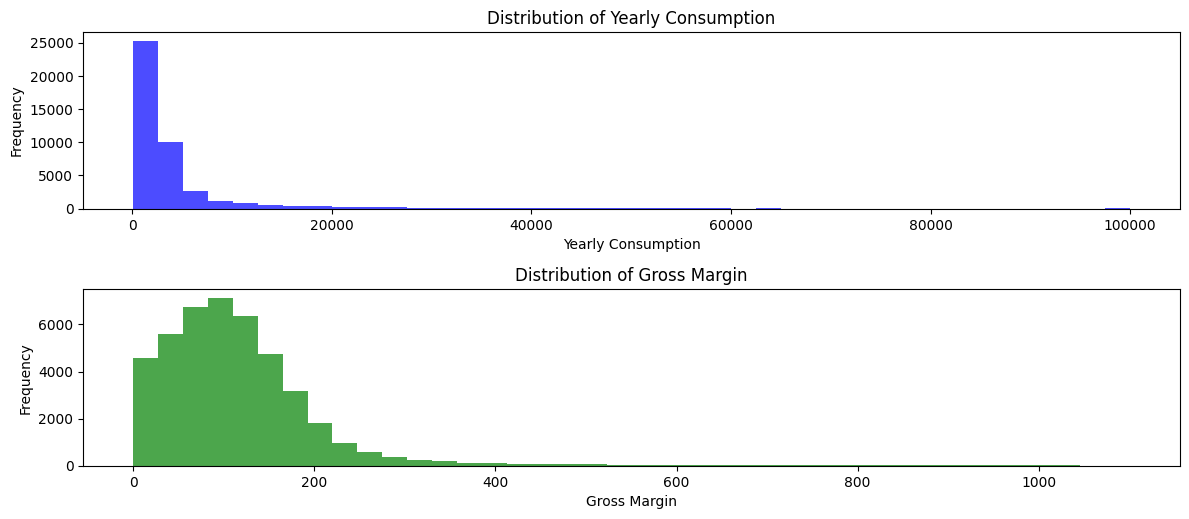

In [17]:
plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.hist(df['yearly_consumption'], bins=40, color='blue', alpha=0.7)
plt.title('Distribution of Yearly Consumption')
plt.xlabel('Yearly Consumption')
plt.ylabel('Frequency')

plt.subplot(4, 1, 2)
plt.hist(df['gross_margin'], bins=40, color='green', alpha=0.7)
plt.title('Distribution of Gross Margin')
plt.xlabel('Gross Margin')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

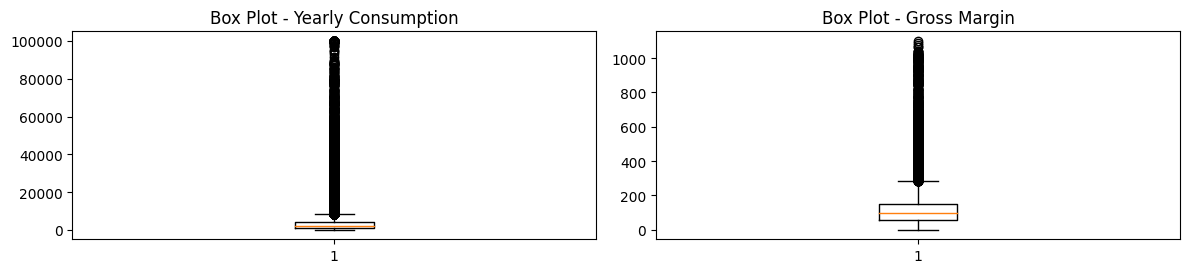

In [18]:
plt.figure(figsize=(12, 10))
plt.subplot(4, 2, 1)
plt.boxplot(df['yearly_consumption'])
plt.title('Box Plot - Yearly Consumption')

plt.subplot(4, 2, 2)
plt.boxplot(df['gross_margin'])
plt.title('Box Plot - Gross Margin')

plt.tight_layout()
plt.show()

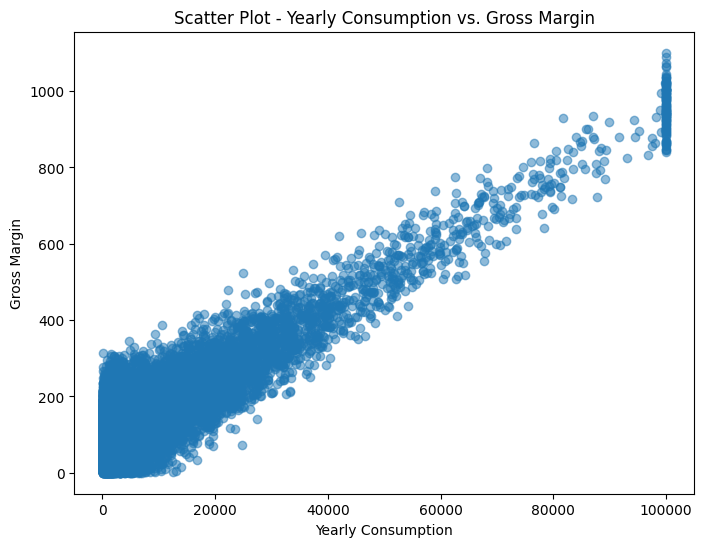

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(df['yearly_consumption'], df['gross_margin'], alpha=0.5)
plt.title('Scatter Plot - Yearly Consumption vs. Gross Margin')
plt.xlabel('Yearly Consumption')
plt.ylabel('Gross Margin')
plt.show()

There seems to a correlation between yearly consumption & gross margin per contract. I will conduct correlation analysis later on the whole data set.

<div style="text-align:center">
    <h1>Cohort data</h1>
</div>

In [20]:
# Calculating the contract duration in months
df["contract_duration_months"] = (np.floor((df["supply_end"] - df["supply_start"]) / np.timedelta64(1, 'M')) + 1).astype(int)
df

,contract_id,customer_id,sales_channel,supply_start,supply_end,yearly_consumption,payment_method,gross_margin,commodity,postcode_2,is_standard_tariff,population_municipality,contract_duration_months
0,3228787796,3465711501,Customers recruit customers,2007-05-01,2007-10-31,4035,No bank details,83.79,Power,23,True,25001-100000 residents,6
1,3709433756,1806480484,Direct sales,2007-08-01,2010-12-31,6577,No bank details,112.25,Power,22,True,>500000 residents,41
2,1670792889,427852089,Inbound and other channels,2007-11-01,2009-11-30,3586,No bank details,89.54,Power,20,True,>500000 residents,25
3,4104584426,3516911733,Inbound and other channels,2007-11-01,2011-04-30,1195,No bank details,12.97,Power,20,True,>500000 residents,42
4,1493963697,3470506741,Direct sales,2008-01-01,2008-01-31,1048,No bank details,142.27,Power,44,True,25001-100000 residents,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43411,685850077,2511702793,Relocation existing customer,2018-09-06,2023-11-17,621,Direct debit,14.80,Power,14,False,>500000 residents,62
43412,681191297,2459004863,Customers recruit customers,2018-11-01,2023-11-17,1225,Direct debit,112.08,Power,80,False,>500000 residents,60
43413,2341344037,809810736,Inbound and other channels,2018-10-11,2023-11-17,163,Direct debit,14.27,Power,9,True,0-25000 residents,61
43414,4233969502,500274319,Relocation existing customer,2018-09-29,2023-11-17,2160,Direct debit,95.96,Power,17,True,0-25000 residents,61


In [21]:
df.dtypes

contract_id                          int64
customer_id                          int64
sales_channel                       object
supply_start                datetime64[ns]
supply_end                  datetime64[ns]
yearly_consumption                   int64
payment_method                      object
gross_margin                       float64
commodity                           object
postcode_2                           int64
is_standard_tariff                    bool
population_municipality             object
contract_duration_months             int64
dtype: object

In [22]:
# extracting aqcuisition month (cohort month) and the month of last activity by the customer
df['cohort_month'] =  df.groupby('customer_id')['supply_start'].transform('min')
df['last_active_month'] =  df.groupby('customer_id')['supply_end'].transform('max')
df.head()

,contract_id,customer_id,sales_channel,supply_start,supply_end,yearly_consumption,payment_method,gross_margin,commodity,postcode_2,is_standard_tariff,population_municipality,contract_duration_months,cohort_month,last_active_month
0,3228787796,3465711501,Customers recruit customers,2007-05-01,2007-10-31,4035,No bank details,83.79,Power,23,True,25001-100000 residents,6,2007-05-01,2007-10-31
1,3709433756,1806480484,Direct sales,2007-08-01,2010-12-31,6577,No bank details,112.25,Power,22,True,>500000 residents,41,2007-08-01,2010-12-31
2,1670792889,427852089,Inbound and other channels,2007-11-01,2009-11-30,3586,No bank details,89.54,Power,20,True,>500000 residents,25,2007-11-01,2011-06-30
3,4104584426,3516911733,Inbound and other channels,2007-11-01,2011-04-30,1195,No bank details,12.97,Power,20,True,>500000 residents,42,2007-11-01,2011-04-30
4,1493963697,3470506741,Direct sales,2008-01-01,2008-01-31,1048,No bank details,142.27,Power,44,True,25001-100000 residents,1,2008-01-01,2008-01-31


In [23]:
# creating a date element function to get a series for subtraction
def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year

In [24]:
# geting date elements for our cohort and contract columns
_,last_active_month,contract_year =  get_date_elements(df,'last_active_month')
_,Cohort_month,Cohort_year =  get_date_elements(df,'cohort_month')

In [25]:
#creating a cohort index based on the entire number of month we have the customer for
year_diff = contract_year -Cohort_year
month_diff = last_active_month - Cohort_month
df['cohort_index'] = year_diff*12+month_diff+1
df.tail()

,contract_id,customer_id,sales_channel,supply_start,supply_end,yearly_consumption,payment_method,gross_margin,commodity,postcode_2,is_standard_tariff,population_municipality,contract_duration_months,cohort_month,last_active_month,cohort_index
43411,685850077,2511702793,Relocation existing customer,2018-09-06,2023-11-17,621,Direct debit,14.80,Power,14,False,>500000 residents,62,2009-04-01,2023-11-17,176
43412,681191297,2459004863,Customers recruit customers,2018-11-01,2023-11-17,1225,Direct debit,112.08,Power,80,False,>500000 residents,60,2012-05-15,2023-11-17,139
43413,2341344037,809810736,Inbound and other channels,2018-10-11,2023-11-17,163,Direct debit,14.27,Power,9,True,0-25000 residents,61,2012-05-25,2023-11-17,139
43414,4233969502,500274319,Relocation existing customer,2018-09-29,2023-11-17,2160,Direct debit,95.96,Power,17,True,0-25000 residents,61,2009-11-01,2023-11-17,169
43415,247260950,2835422850,Inbound and other channels,2018-12-01,2023-11-17,1055,Direct debit,63.82,Power,4,True,0-25000 residents,59,2012-06-25,2023-11-17,138


<div style="text-align:center">
    <h1>Correlation analysis</h1>
</div>

In [26]:
# getting rid of irrelevant fields
corr_df = df.drop(columns=["contract_id", "customer_id", "sales_channel", "supply_start", "supply_end", "cohort_month", "customer_id", "postcode_2", "contract_duration_months", "last_active_month"])

In [27]:
# turning categorical features into boolean values
corr_df = pd.get_dummies(corr_df)
corr_df

,yearly_consumption,gross_margin,is_standard_tariff,cohort_index,payment_method_Direct debit,payment_method_Invoice,payment_method_No bank details,payment_method_Wrong bank details,commodity_Gas,commodity_Heat,commodity_Power,population_municipality_0-25000 residents,population_municipality_100001-500000 residents,population_municipality_25001-100000 residents,population_municipality_>500000 residents,population_municipality_unknown
0,4035,83.79,True,6,False,False,True,False,False,False,True,False,False,True,False,False
1,6577,112.25,True,41,False,False,True,False,False,False,True,False,False,False,True,False
2,3586,89.54,True,44,False,False,True,False,False,False,True,False,False,False,True,False
3,1195,12.97,True,42,False,False,True,False,False,False,True,False,False,False,True,False
4,1048,142.27,True,1,False,False,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43411,621,14.80,False,176,True,False,False,False,False,False,True,False,False,False,True,False
43412,1225,112.08,False,139,True,False,False,False,False,False,True,False,False,False,True,False
43413,163,14.27,True,139,True,False,False,False,False,False,True,True,False,False,False,False
43414,2160,95.96,True,169,True,False,False,False,False,False,True,True,False,False,False,False


In [28]:
# correlation analysis
corr = corr_df.corr()
corr

,yearly_consumption,gross_margin,is_standard_tariff,cohort_index,payment_method_Direct debit,payment_method_Invoice,payment_method_No bank details,payment_method_Wrong bank details,commodity_Gas,commodity_Heat,commodity_Power,population_municipality_0-25000 residents,population_municipality_100001-500000 residents,population_municipality_25001-100000 residents,population_municipality_>500000 residents,population_municipality_unknown
yearly_consumption,1.000000,0.826708,-0.075986,-0.052511,-0.045050,0.039709,0.023410,-0.000674,0.476073,0.182601,-0.488932,0.069872,-0.004606,0.028680,-0.084593,-0.007609
gross_margin,0.826708,1.000000,-0.064524,-0.045610,-0.034207,0.029449,0.020035,-0.001069,0.390390,0.151273,-0.401051,0.057556,-0.005455,0.027744,-0.071599,-0.005397
is_standard_tariff,-0.075986,-0.064524,1.000000,0.033248,0.001709,0.001787,-0.012618,0.005170,0.002671,-0.197444,0.012349,-0.017496,0.018578,0.001750,0.002738,-0.005889
cohort_index,-0.052511,-0.045610,0.033248,1.000000,0.178739,-0.166567,-0.050588,-0.034215,-0.018427,-0.007036,0.018922,-0.024551,-0.053994,-0.032524,0.089566,-0.019663
payment_method_Direct debit,-0.045050,-0.034207,0.001709,0.178739,1.000000,-0.933023,-0.304915,-0.135144,-0.010014,0.000912,0.009923,0.014552,-0.021940,-0.022028,0.018367,-0.001564
payment_method_Invoice,0.039709,0.029449,0.001787,-0.166567,-0.933023,1.000000,-0.025155,-0.011149,0.004423,-0.000004,-0.004413,-0.010384,0.020362,0.022665,-0.021790,0.002170
payment_method_No bank details,0.023410,0.020035,-0.012618,-0.050588,-0.304915,-0.025155,1.000000,-0.003644,0.015370,-0.002303,-0.015162,-0.014538,0.006382,0.002310,0.007768,-0.000463
payment_method_Wrong bank details,-0.000674,-0.001069,0.005170,-0.034215,-0.135144,-0.011149,-0.003644,1.000000,0.005342,-0.001021,-0.005253,0.000168,0.004348,-0.000706,-0.002570,-0.002244
commodity_Gas,0.476073,0.390390,0.002671,-0.018427,-0.010014,0.004423,0.015370,0.005342,1.000000,-0.009695,-0.997105,-0.025782,0.050430,0.030258,-0.032067,-0.018832
commodity_Heat,0.182601,0.151273,-0.197444,-0.007036,0.000912,-0.000004,-0.002303,-0.001021,-0.009695,1.000000,-0.066369,-0.011888,-0.000323,-0.002993,0.014127,-0.001419


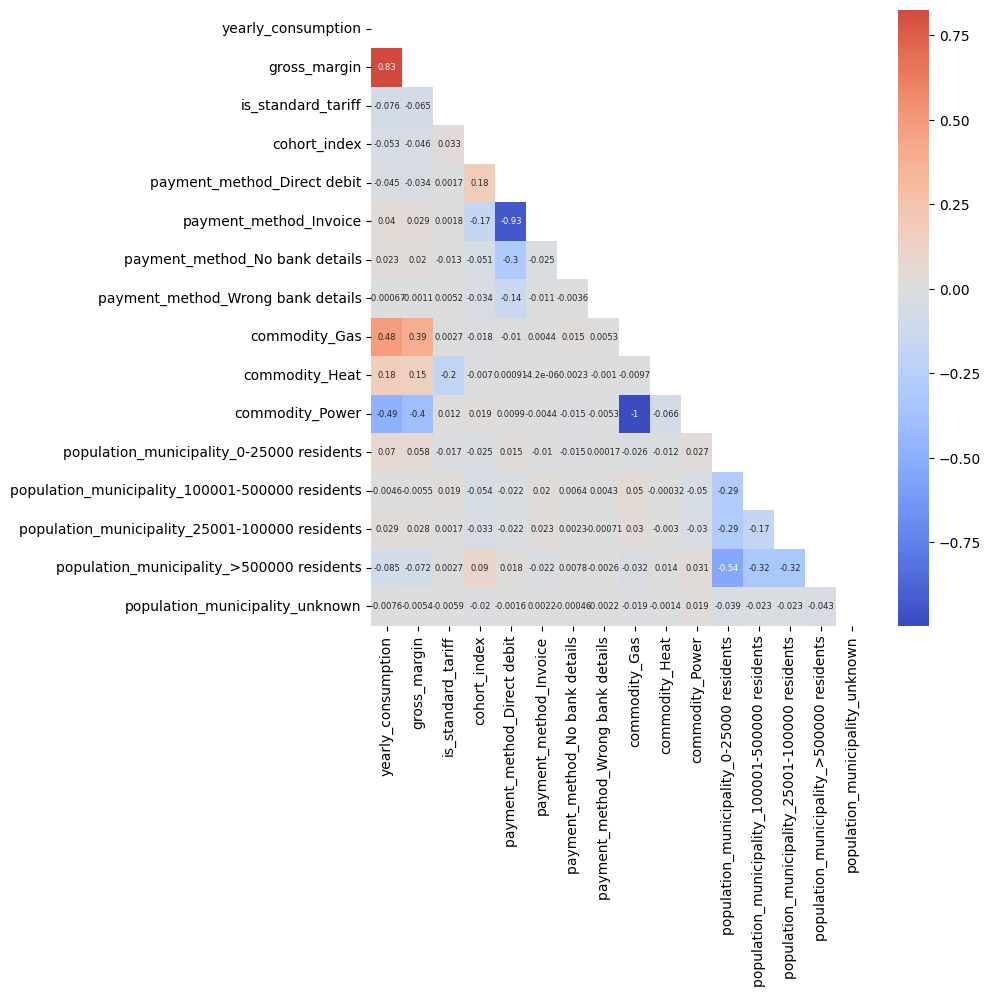

In [29]:
# visualisation
fig, ax = plt.subplots(figsize=(8, 8))

mask = np.zeros_like(corr_df.corr())
mask[np.triu_indices_from(mask)] = True

annot_kws = {"size": 6}

sns.heatmap(corr_df.corr(), mask=mask, annot=True, cmap='coolwarm', center=0, annot_kws=annot_kws)

plt.show()

The yearly cosumtion metric seems to be the most influential as it's the one correlating the most with other features.

<div style="text-align:center">
    <h1>Cohort & Consumption Analysis</h1>
</div>

### Median customer active months (cohort_index) per: Sales Channel, Payment Method, Tariff, Population Municipality and Commodity

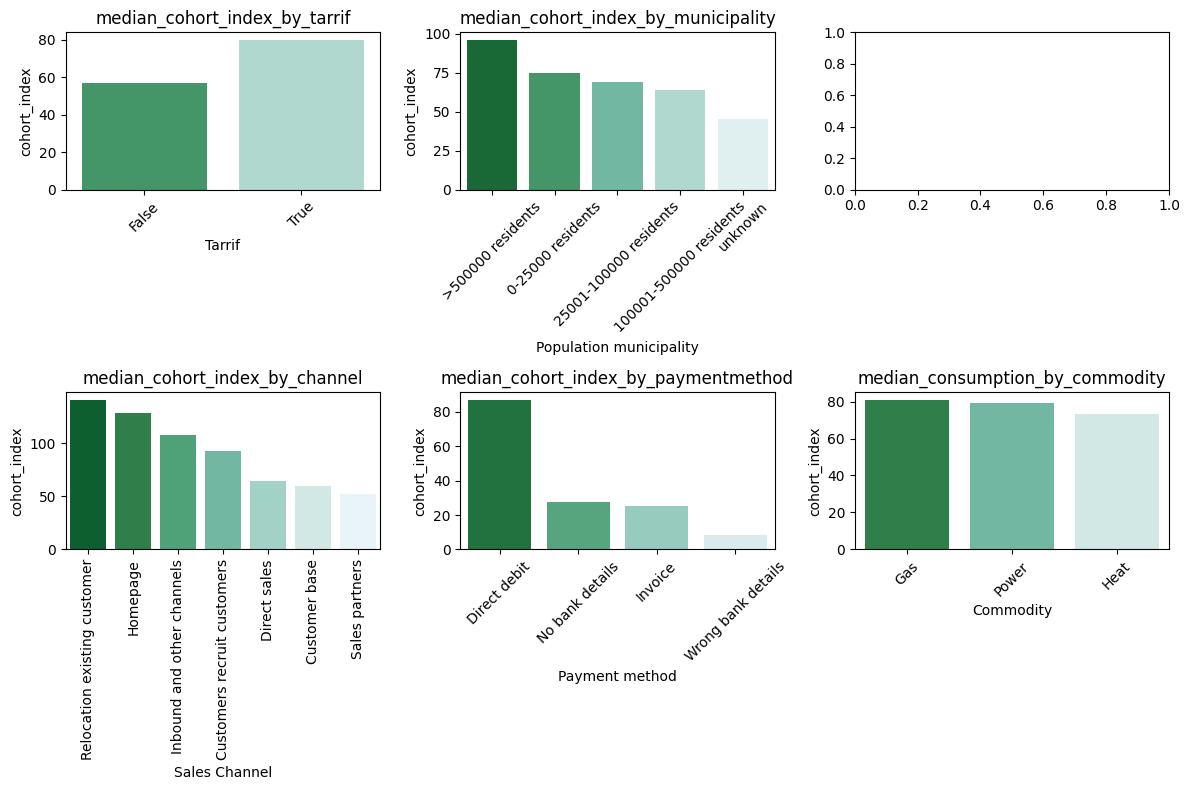

In [30]:
median_cohort_index_by_channel = df.groupby('sales_channel')['cohort_index'].median().reset_index().sort_values(by='cohort_index', ascending=False)
median_cohort_index_by_paymentmethod = df.groupby('payment_method')['cohort_index'].median().reset_index().sort_values(by='cohort_index', ascending=False)
median_cohort_index_by_tarrif = df.groupby('is_standard_tariff')['cohort_index'].median().reset_index().sort_values(by='cohort_index', ascending=False)
median_cohort_index_by_municipality = df.groupby('population_municipality')['cohort_index'].median().reset_index().sort_values(by='cohort_index', ascending=False)
median_consumption_by_commodity = df.groupby('commodity')['cohort_index'].median().reset_index().sort_values(by='cohort_index', ascending=False)

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

sns.barplot(x='is_standard_tariff', y='cohort_index', data=median_cohort_index_by_tarrif, ax=axes[0, 0], palette='BuGn_r')
axes[0, 0].set_title('median_cohort_index_by_tarrif')
axes[0, 0].set_xlabel('Tarrif')
axes[0, 0].set_ylabel('cohort_index')
axes[0, 0].tick_params(axis='x', rotation=45)  

sns.barplot(x='population_municipality', y='cohort_index', data=median_cohort_index_by_municipality, ax=axes[0, 1], palette='BuGn_r')
axes[0, 1].set_title('median_cohort_index_by_municipality')
axes[0, 1].set_xlabel('Population municipality')
axes[0, 1].set_ylabel('cohort_index')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.barplot(x='sales_channel', y='cohort_index', data=median_cohort_index_by_channel, ax=axes[1, 0], palette='BuGn_r')
axes[1, 0].set_title('median_cohort_index_by_channel')
axes[1, 0].set_xlabel('Sales Channel')
axes[1, 0].set_ylabel('cohort_index')
axes[1, 0].tick_params(axis='x', rotation=90)

sns.barplot(x='payment_method', y='cohort_index', data=median_cohort_index_by_paymentmethod, ax=axes[1, 1], palette='BuGn_r')
axes[1, 1].set_title('median_cohort_index_by_paymentmethod')
axes[1, 1].set_xlabel('Payment method')
axes[1, 1].set_ylabel('cohort_index')
axes[1, 1].tick_params(axis='x', rotation=45)

sns.barplot(x='commodity', y='cohort_index', data=median_consumption_by_commodity, ax=axes[1, 2], palette='BuGn_r')
axes[1, 2].set_title('median_consumption_by_commodity')
axes[1, 2].set_xlabel('Commodity')
axes[1, 2].set_ylabel('cohort_index')
axes[1, 2].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()

Here we can see the longest-lasting are:
- Direct debit
- Standard terrif
- Bigger cities
- relocating or lichtblink website customers

### Median yearly consumption per: Sales Channel, Payment Method, Tariff, Population Municipality and Commodity

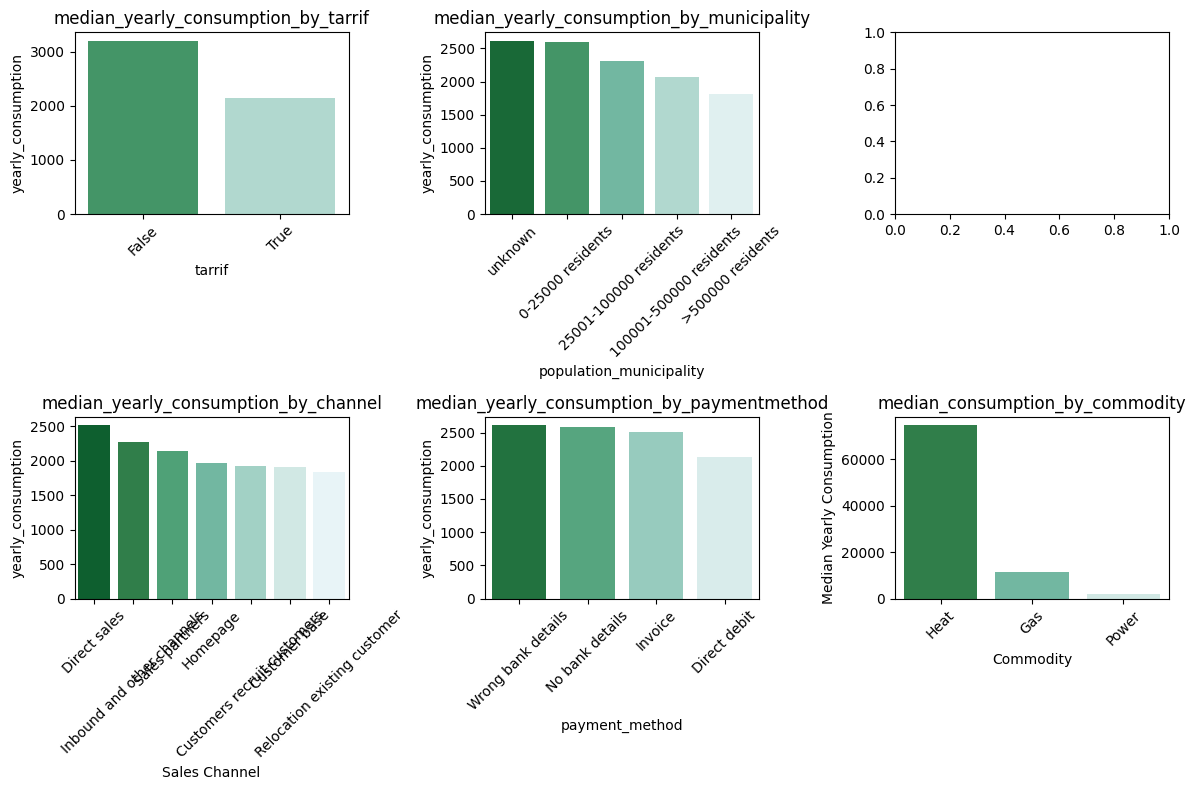

In [31]:
median_yearly_consumption_by_channel = df.groupby('sales_channel')['yearly_consumption'].median().reset_index().sort_values(by='yearly_consumption', ascending=False)
median_yearly_consumption_by_paymentmethod = df.groupby('payment_method')['yearly_consumption'].median().reset_index().sort_values(by='yearly_consumption', ascending=False)
median_yearly_consumption_by_tarrif = df.groupby('is_standard_tariff')['yearly_consumption'].median().reset_index().sort_values(by='yearly_consumption', ascending=False)
median_yearly_consumption_by_municipality = df.groupby('population_municipality')['yearly_consumption'].median().reset_index().sort_values(by='yearly_consumption', ascending=False)
median_consumption_by_commodity = df.groupby('commodity')['yearly_consumption'].median().reset_index().sort_values(by='yearly_consumption', ascending=False)

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

sns.barplot(x='is_standard_tariff', y='yearly_consumption', data=median_yearly_consumption_by_tarrif, ax=axes[0, 0], palette='BuGn_r')
axes[0, 0].set_title('median_yearly_consumption_by_tarrif')
axes[0, 0].set_xlabel('tarrif')
axes[0, 0].set_ylabel('yearly_consumption')
axes[0, 0].tick_params(axis='x', rotation=45)  

sns.barplot(x='population_municipality', y='yearly_consumption', data=median_yearly_consumption_by_municipality, ax=axes[0, 1], palette='BuGn_r')
axes[0, 1].set_title('median_yearly_consumption_by_municipality')
axes[0, 1].set_xlabel('population_municipality')
axes[0, 1].set_ylabel('yearly_consumption')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.barplot(x='sales_channel', y='yearly_consumption', data=median_yearly_consumption_by_channel, ax=axes[1, 0], palette='BuGn_r')
axes[1, 0].set_title('median_yearly_consumption_by_channel')
axes[1, 0].set_xlabel('Sales Channel')
axes[1, 0].set_ylabel('yearly_consumption')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.barplot(x='payment_method', y='yearly_consumption', data=median_yearly_consumption_by_paymentmethod, ax=axes[1, 1], palette='BuGn_r')
axes[1, 1].set_title('median_yearly_consumption_by_paymentmethod')
axes[1, 1].set_xlabel('payment_method')
axes[1, 1].set_ylabel('yearly_consumption')
axes[1, 1].tick_params(axis='x', rotation=45)

sns.barplot(x='commodity', y='yearly_consumption', data=median_consumption_by_commodity, ax=axes[1, 2], palette='BuGn_r')
axes[1, 2].set_title('median_consumption_by_commodity')
axes[1, 2].set_xlabel('Commodity')
axes[1, 2].set_ylabel('Median Yearly Consumption')
axes[1, 2].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()


FRom a consumption point view, we can see the longest-lasting are:
- Heat
- Direct sales & inbound

### Median Yearly Consumption per customers' active months cohort

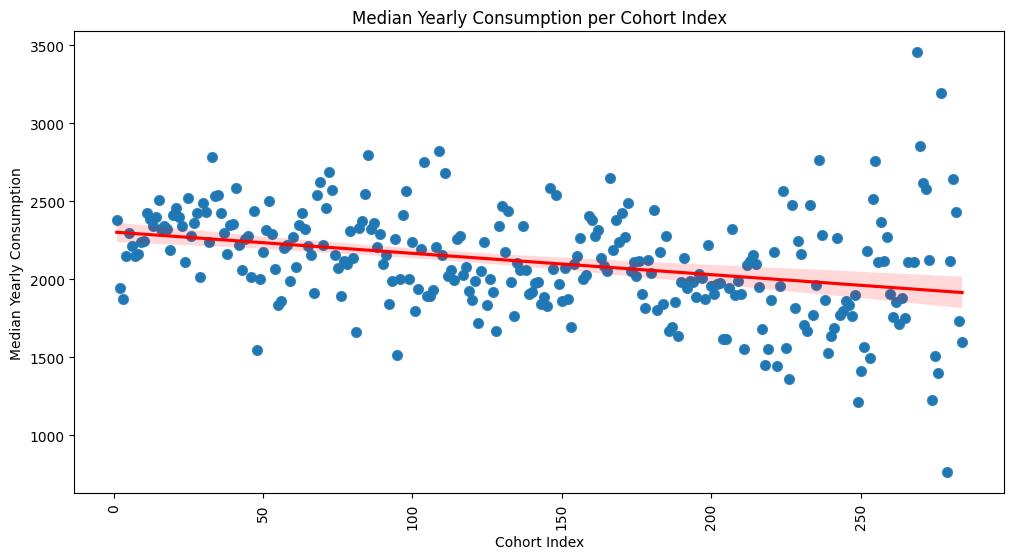

In [32]:
median_consumption_by_cohort = df.groupby('cohort_index')['yearly_consumption'].median().reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='cohort_index', y='yearly_consumption', data=median_consumption_by_cohort, s=50)

sns.regplot(x='cohort_index', y='yearly_consumption', data=median_consumption_by_cohort, scatter_kws={'s': 50}, line_kws={'color': 'red'})

plt.title('Median Yearly Consumption per Cohort Index')
plt.xlabel('Cohort Index')
plt.ylabel('Median Yearly Consumption')
plt.xticks(rotation=90)
plt.show()

The median yearly consumption doesn't seem to effected much by the number of customers' active months. However it's worth noting the slight increase in short-term customers.

<div style="text-align:center">
    <h1>Churn analysis</h1>
</div>

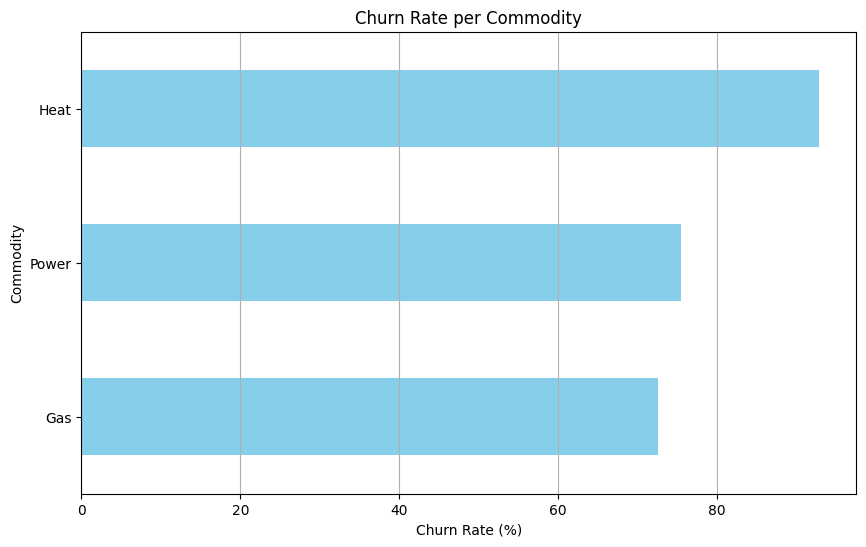

In [33]:
churned_customers = df[df['supply_end'] != '2023-11-17']
rate = churned_customers.groupby('commodity')['customer_id'].count() /df.groupby('commodity')['customer_id'].count()*100

plt.figure(figsize=(10, 6))
rate.sort_values().plot(kind='barh', color='skyblue')
plt.title('Churn Rate per Commodity')
plt.xlabel('Churn Rate (%)')
plt.ylabel('Commodity')
plt.grid(axis='x')
plt.show()

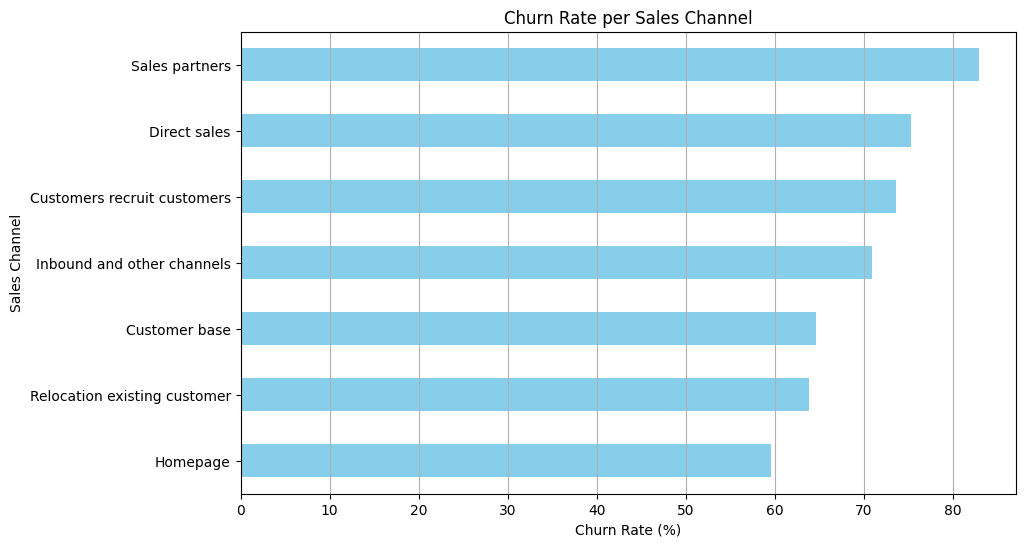

In [34]:
rate = churned_customers.groupby('sales_channel')['customer_id'].count() /df.groupby('sales_channel')['customer_id'].count()*100

plt.figure(figsize=(10, 6))
rate.sort_values().plot(kind='barh', color='skyblue')
plt.title('Churn Rate per Sales Channel')
plt.xlabel('Churn Rate (%)')
plt.ylabel('Sales Channel')
plt.grid(axis='x')
plt.show()

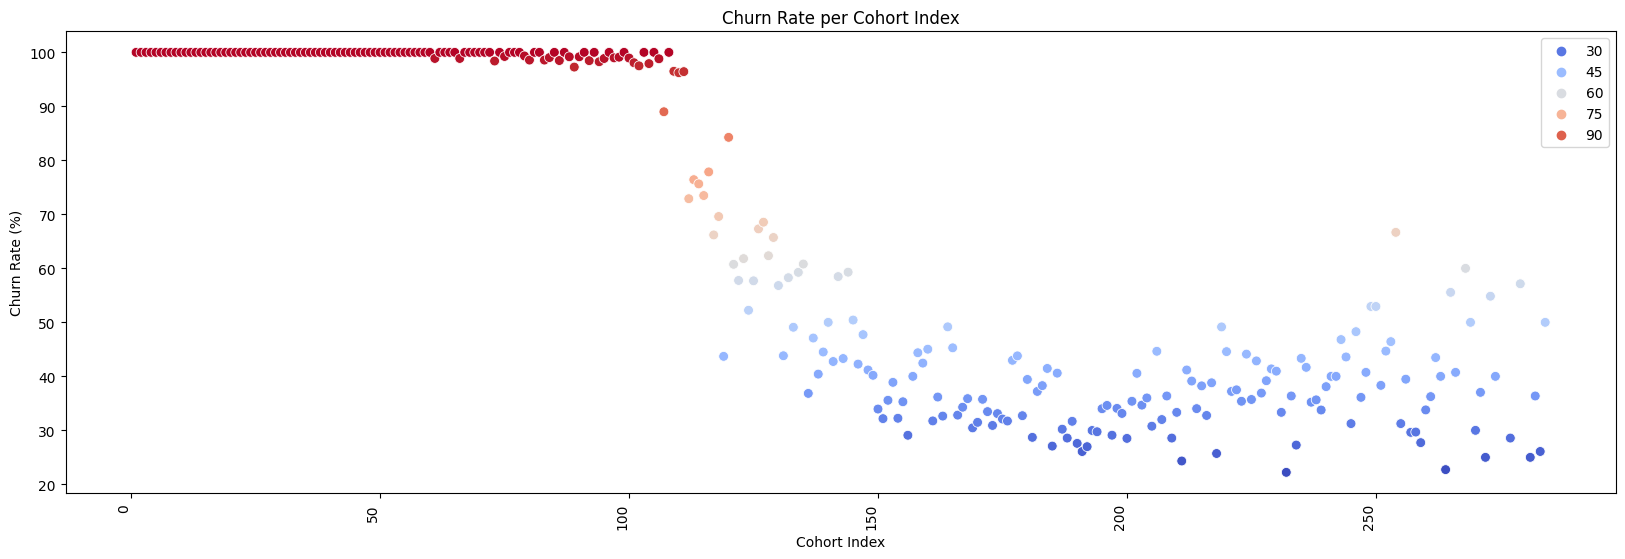

In [35]:
rate = churned_customers.groupby('cohort_index')['customer_id'].count() /df.groupby('cohort_index')['customer_id'].count()*100

plt.figure(figsize=(20, 6))
ax = sns.scatterplot(x=rate.index, y=rate.values, hue=rate.values, palette="coolwarm", s=50)

# Highlight cohort_indexes from 60 to 110
highlight_indexes = range(60, 111)
for point in ax.get_children():
    if isinstance(point, plt.Line2D) and point.get_xdata()[0] in highlight_indexes:
        churn_rate = rate[int(point.get_xdata()[0])]
        color = 'red' if churn_rate < 5 else 'orange' if churn_rate < 10 else 'green'
        point.set_markerfacecolor(color)

plt.title('Churn Rate per Cohort Index')
plt.xlabel('Cohort Index')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.show()

### Key Takeaways

The yearly consumption metric seems to be the most influential as it's the one correlating the most with other features. However I'd suggest conbining it with with customer duration (customer months with teh company) since retention is essential to our products\contracts.

From a customer duration point of view, the longest-lasting are:
- Direct debit (payment method)
- Standard tarif
- Bigger cities (population municipality)
- relocating or company website customers (sales channel)


From a consumption point of view, the highest consumers are:
- Heat (Commodity)
- Direct sales and inbound (sales channel)

The median yearly consumption doesn't seem to effected much by the number of customers' active months. However it's worth noting the slight increase in short-term customers.


From a churn point of view the one who churn the most are:
- Heat (Commodity)
- direct sales and inbound (sales channel).. The same as highest consumers
- short-time customers (the longer the customer stayes the more likely they won't churn)



### Recommendations
Decrease the the churn of Heat (commodity), Direct sales and Inbound (sales channel) customers by promoting Direct debit (payment method) and Standard tarif in bigger cities by promoting the company website and good rebost relocation service or any other ways especially for customers who have been with the company for less than 100 months



Thank you very much for your attention!

Best,
Majed